In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

In [15]:
df = pd.read_csv("heart.csv")

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
x = df.drop('target', axis=1)

In [20]:
y = df['target']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size = 0.2, random_state=42)

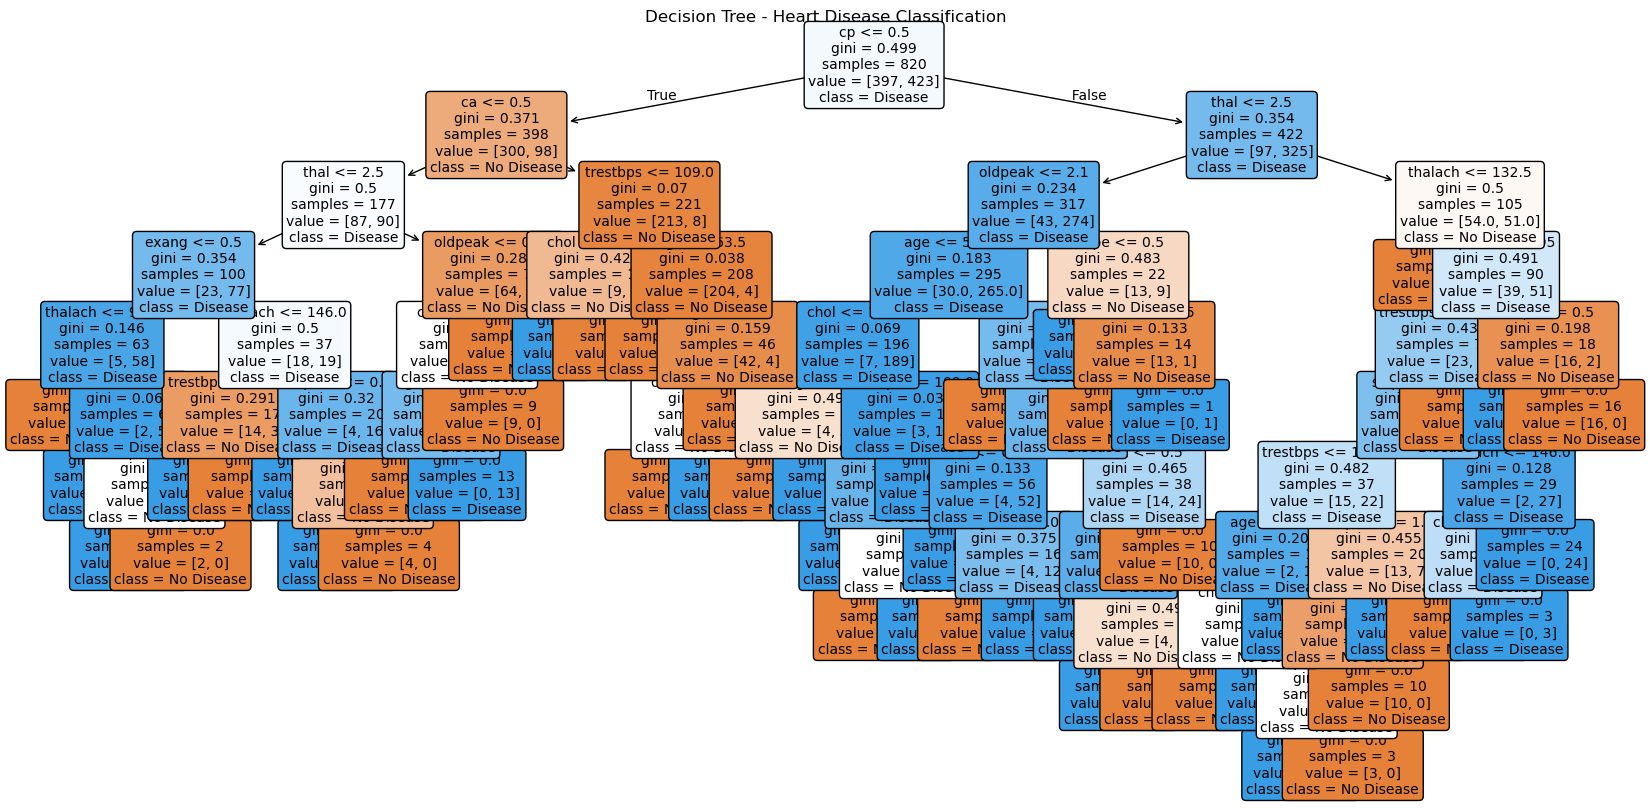

In [25]:
# Train the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=x.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree - Heart Disease Classification")
plt.show()

In [27]:
# 1. Decision Tree without depth limit (likely to overfit)

dt_overfit = DecisionTreeClassifier(random_state=42)
dt_overfit.fit(x_train, y_train)
y_pred_overfit = dt_overfit.predict(x_test)
acc_overfit = accuracy_score(y_test, y_pred_overfit)

In [28]:
# 2. Decision Tree with controlled depth

dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(x_train, y_train)
y_pred_pruned = dt_pruned.predict(x_test)
acc_pruned = accuracy_score(y_test, y_pred_pruned)

In [29]:
print("=== Decision Tree Without Depth Control ===")
print("Accuracy:", acc_overfit)
print(classification_report(y_test, y_pred_overfit))

print("=== Decision Tree With max_depth=4 ===")
print("Accuracy:", acc_pruned)
print(classification_report(y_test, y_pred_pruned))

=== Decision Tree Without Depth Control ===
Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

=== Decision Tree With max_depth=4 ===
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



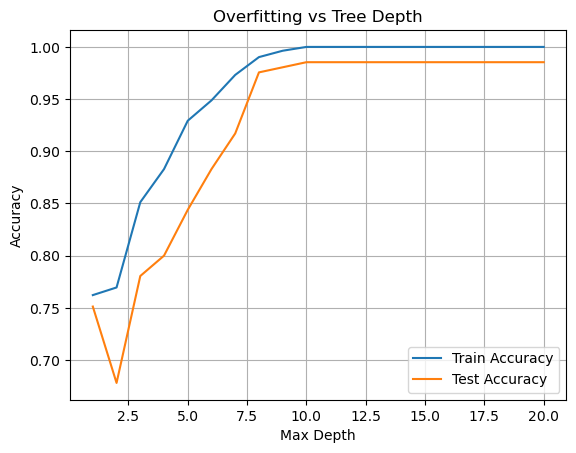

In [31]:
# Visualize accuracy with different depths
depths = range(1, 21)
train_scores = []
test_scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(x_train, y_train)
    train_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))

plt.plot(depths, train_scores, label='Train Accuracy')
plt.plot(depths, test_scores, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting vs Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Train Decision Tree with limited depth
dt_new = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_new.fit(x_train, y_train)
y_pred_dt_new = dt_new.predict(x_test)
acc_dt_new = accuracy_score(y_test, y_pred_dt_new)

In [35]:
# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [37]:
# Print accuracy comparison
print("=== Decision Tree (max_depth=4) ===")
print("Accuracy:", acc_dt_new)
print(classification_report(y_test, y_pred_dt_new))

print("\n=== Random Forest ===")
print("Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf))

=== Decision Tree (max_depth=4) ===
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205


=== Random Forest ===
Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [38]:
# === 4. Feature Importances ===
importances = rf.feature_importances_
feature_df = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)


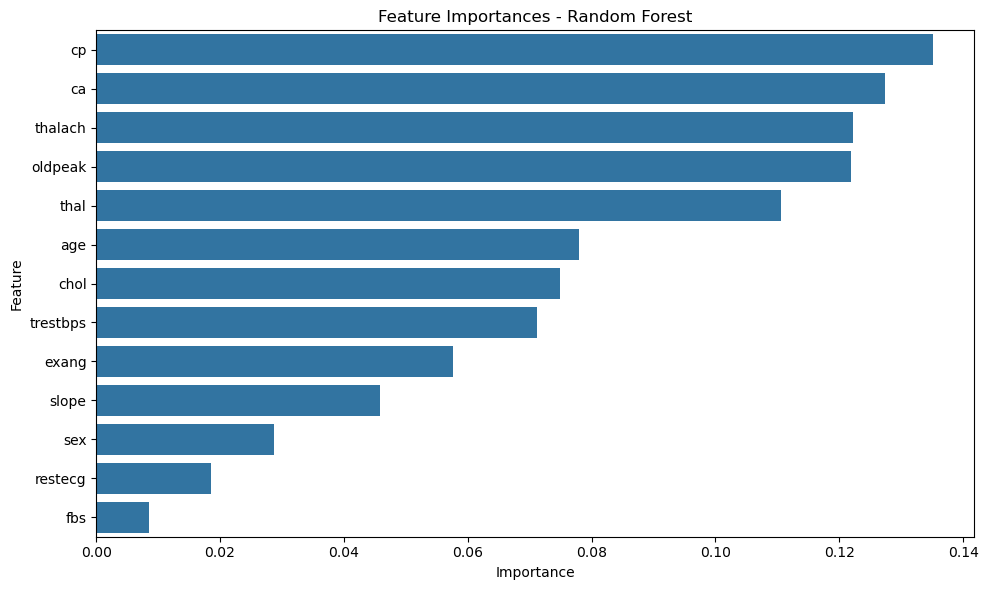

In [41]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


In [43]:
# Evaluate Using Cross-Validation ===
cv_scores = cross_val_score(rf, x, y, cv=5)  # 5-fold cross-validation
print("Cross-validation Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())


Cross-validation Scores: [1.         1.         1.         1.         0.98536585]
Average CV Accuracy: 0.9970731707317073
